In [1]:
# Biblioteca para trabalhar com grafos
import networkx as nx

# Biblioteca para plotar os grafos
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

import numpy as np
import random as rd
import tsplib95

ImportError: cannot import name 'six' from 'sklearn.externals' (/home/naz/.local/lib/python3.8/site-packages/sklearn/externals/__init__.py)

In [2]:
def NearestNeighbor(mat):
    n = len(mat[0])
    used = np.zeros(n, dtype=bool)
    used[0] = True
    cost = 0
    last = 0
    path = [0]
    for i in range(1, n):
        minarg = -1
        min = np.inf
        for j in range(1, n):
            if (not used[j] and mat[last][j] < min):
                min = mat[last][j]
                minarg = j
        if minarg >= 0:
            cost += min
            last = minarg
            path.append(last)
            used[last] = True

    cost += mat[last][0]
    return cost, path

In [3]:
def get_distance_matrix(problem):
    n = problem.dimension
    plus = 0
    if next(problem.get_nodes()) == 1:
        plus = 1

    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + plus, n):
            distance_matrix[i, j] = problem.get_weight(i + plus, j + plus)
    
    return distance_matrix

In [4]:
def randomGraph(n, W=1000, H=1000):
    coordinates = []
    for i in range(n):
        coordinates.append((rd.randint(0, W), rd.randint(0, H)))

    dist_matrix = squareform(pdist(coordinates))
    G = nx.complete_graph(n)
    for i in range(n):
        G.nodes[i]["pos"] = coordinates[i]
        G.nodes[i]["label"] = i
    return G, dist_matrix

In [5]:
def testGraph(problem):
    coordinates = list(problem.node_coords.values())
    dist_matrix = squareform(pdist(coordinates))
    #dist_matrix = get_distance_matrix(problem)
    G = nx.complete_graph(problem.dimension)
    
    for i in range(problem.dimension):
        G.nodes[i]["pos"] = coordinates[i]
        G.nodes[i]["label"] = i
    return G, dist_matrix

In [6]:
def oneTree(oneT, Gm1, mat, pi):
    n = Gm1.number_of_nodes()
    for i in range(n):
        for j in range(i):
            Gm1.edges[j, i]['w'] = Gm1.edges[i, j]['w'] = mat[i][j] + pi[i] + pi[j]

    # gerando a árvore com o restando dos nós.
    spaningTree = nx.minimum_spanning_tree(Gm1, algorithm="kruskal", weight='w')
    # nx.draw_networkx(spaningTree, spaningTree.nodes.data('pos'), with_labels=True, node_size=200, font_size=8)
    # localizar as menores arestas que conectam o nó removido na matriz de distâncias
    vet = np.zeros(n)
    for i in range(n):
        vet[i] = mat[n][i] + pi[i] + pi[n]
    a, b = np.argpartition(vet, 2)[:2]

    # inserindo o nó removido
    oneT.clear_edges()
    oneT.add_edges_from(spaningTree.edges)
    oneT.add_edge(n, a)
    oneT.add_edge(n, b)
    return

In [7]:
def w_funcPi(graph, mat, pi):
    cost = 0
    for i, j in graph.edges:
        cost += mat[i][j] + pi[i] + pi[j]
    return cost

In [8]:
def w_func(graph, mat):
    cost = 0
    for i, j in graph.edges:
        cost += mat[i][j]
    return cost

In [9]:
def degree(graph):
    n = graph.number_of_nodes()
    d = np.zeros(n)
    deg = graph.degree()
    for i in range(n):
        d[i] = deg[i]
    return d

In [10]:
def all_equals(vet, x):
    for i in vet:
        if x != i:
            return False
    return True

In [11]:
def oneTree2(oneT, G, mat, pi):
    n = G.number_of_nodes()
    for i in range(n):
        for j in range(i):
            G.edges[j, i]['w'] = G.edges[i, j]['w'] = mat[i][j] + pi[i] + pi[j]

    # gerando a árvore com o restando dos nós.
    spaningTree = nx.minimum_spanning_tree(G, algorithm="kruskal", weight='w')
    # nx.draw_networkx(spaningTree, spaningTree.nodes.data('pos'), with_labels=True, node_size=200, font_size=8)
    oneT.clear_edges()
    oneT.add_edges_from(spaningTree.edges)
    min = np.inf
    argmin = -1
    for i in range(n):
        for j in range(i):
            if not (oneT.has_edge(i, j) or oneT.has_edge(j, i)):
                if min > G.edges[i, j]['w']:
                    min = G.edges[i, j]['w']
                    argmin = (i, j)

    oneT.add_edge(*argmin)
    return

52.210910489244405 2.8284271247461903 1.248801231855988
52.73930710124639 5.291502622129181 1.248801231855988
54.575690542376485 4.69041575982343 0.7756529390409863
56.38678964684348 5.830951894845301 0.7756529390409863
60.70520850298864 4.47213595499958 0.7756529390409863
60.93079812201896 4.47213595499958 0.7756529390409863
62.577811007157464 4.47213595499958 0.7756529390409863
64.41603747940805 4.242640687119285 0.7756529390409863
66.96495031511195 3.4641016151377544 0.7756529390409863
68.02853859140673 2.8284271247461903 0.48177201182669954
68.52487687886018 3.1622776601683795 0.48177201182669954
68.87747297322854 3.4641016151377544 0.48177201182669954
69.63486953461786 3.4641016151377544 0.48177201182669954
70.33735439789884 2.449489742783178 0.48177201182669954
70.69792154018826 2.8284271247461903 0.48177201182669954
71.04504193588498 4.0 0.2992372744265214
71.89999128797581 3.4641016151377544 0.2992372744265214
71.98981113476843 2.0 0.18586166113448535
72.05326943394631 3.162277

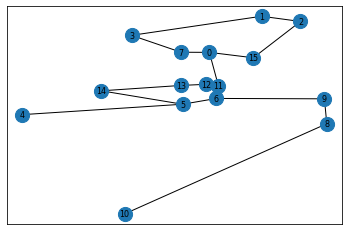

In [12]:
#problem = tsplib95.load(f'../../instances/tsp_data/burma14.tsp')
problem = tsplib95.load(f'../../instances/tsp_data/ulysses16.tsp')
#problem = tsplib95.load(f'../../instances/tsp_data/eil51.tsp')
#problem = tsplib95.load(f'../../instances/tsp_data/tsp225.tsp')
#rd.seed(7)
#G, mat = randomGraph(14)
G, mat = testGraph(problem)

oneT = nx.Graph.copy(G)

Gm1 = nx.Graph.copy(G)
# removendo o nó do Grafo G
Gm1.remove_node(G.number_of_nodes() - 1)

pi = np.zeros(G.number_of_nodes())

# pi = np.random.randint(-5,5,G.number_of_nodes())
# pi[1] = 450
# pi[3] = 100
# pi[0] = 50


##
ub, path = NearestNeighbor(mat)

# x = 0
# for i in range(1, len(path)):
#     x += mat[path[i - 1]][path[i]]
# x += mat[0][path[-1]]


l = 2
bestPi = np.array(pi)
oneTree(oneT, Gm1, mat, pi)
w = w_funcPi(oneT, mat, pi)
maxW = w
minG = np.inf
t = -1
while (True):
    d = degree(oneT)
    if all_equals(d, 2):
        break

    # subgradiente
    g = d - 2
    # passo
    if t == -1:
        tmax = l * ((ub+2*sum(pi)) - w) / (np.linalg.norm(g) ** 2)
        t = tmax
    while t > 1e-6:
        pi = pi + t * g
        # oneTree2(oneT, G, mat, pi)
        oneTree(oneT, Gm1, mat, pi)
        w = w_funcPi(oneT, mat, pi)
        if w > maxW + .001 :
            minG = np.linalg.norm(g)
            bestPi = np.array(pi)
            maxW = w
            break
        else:
            t /= 1.61
            pi = np.array(bestPi)
            w = maxW
    if t <= 1e-6:
        break

    print(w, np.linalg.norm(g), t)


nx.draw_networkx(oneT, oneT.nodes.data('pos'), with_labels=True, node_size=200, font_size=8)
plt.show()

#compareSolutions(oneT, oficialSolucion)

In [13]:
#compareSolutions
#oficialSolution = tsplib95.load(f'../../instances/tsp_opt/eil51.opt.tour')
oficialSolution = tsplib95.load(f'../../instances/tsp_opt/ulysses16.opt.tour')
lista = list(oneT.edges)
arr = list(np.array(oficialSolution.tours[0]) - 1);

oficialSolutionEdges = [(arr[-1], arr[0])]
for i in range(len(arr) - 1):
    j = i + 1
    oficialSolutionEdges.append((arr[i], arr[j]))

In [14]:
print(lista)
print('______________________________________________________________________________')
oficialSolutionEdges = [(i,j) if i<j else (j,i) for i,j in oficialSolutionEdges];#list comprehension
print(oficialSolutionEdges)
print('______________________________________________________________________________')
intersectionEdges = set(lista) & set(oficialSolutionEdges);
print(intersectionEdges);
print('problemLength:' , len(lista))
print('intersectionEdgesLength:' , len(intersectionEdges))
print('percentEdgesInOptimum:', ((len(intersectionEdges)*100)/len(oficialSolutionEdges)))
w_oficial = 0
for i, j in oficialSolutionEdges:
    w_oficial += mat[i][j]
print("OficialSolution:", w_oficial)
print("OneTreeSolution:", w)
print('Gap of Function:', w_oficial - w)

[(0, 7), (0, 11), (0, 15), (1, 2), (1, 3), (2, 15), (3, 7), (4, 5), (5, 6), (5, 14), (6, 9), (8, 9), (8, 10), (11, 12), (12, 13), (13, 14)]
______________________________________________________________________________
[(0, 7), (0, 13), (12, 13), (11, 12), (6, 11), (5, 6), (5, 14), (4, 14), (4, 10), (8, 10), (8, 9), (9, 15), (2, 15), (1, 2), (1, 3), (3, 7)]
______________________________________________________________________________
{(0, 7), (1, 2), (5, 14), (3, 7), (12, 13), (8, 10), (11, 12), (8, 9), (5, 6), (2, 15), (1, 3)}
problemLength: 16
intersectionEdgesLength: 11
percentEdgesInOptimum: 68.75
OficialSolution: 74.10873595815309
OneTreeSolution: 73.26477262367212
Gap of Function: 0.8439633344809749


In [15]:
a = [(0, 7), (0, 11), (0, 15), (1, 2), (1, 3), (2, 15), (3, 7), (4, 5), (5, 6), (5, 14), (6, 9), (8, 9), (8, 10), (11, 12), (12, 13), (13, 14)];
b = [(7, 0), (0, 13), (13, 12), (12, 11), (11, 6), (6, 5), (5, 14), (14, 4), (4, 10), (10, 8), (8, 9), (9, 15), (15, 2), (2, 1), (1, 3), (3, 7)];
c = [(i,j) if i<j else (j,i) for i,j in b];#list comprehension
print(a);
print(b);
print(c);
print(set(a) & set(c));
#a = np.array(a);
#print(set(a));
#b = np.array([(7, 0), (0, 13), (13, 12), (12, 11), (11, 6), (6, 5), (5, 14), (14, 4), (4, 10), (10, 8), (8, 9), (9, 15), (15, 2), (2, 1), (1, 3), (3, 7)]);
#print(set(a) & set(b));

[(0, 7), (0, 11), (0, 15), (1, 2), (1, 3), (2, 15), (3, 7), (4, 5), (5, 6), (5, 14), (6, 9), (8, 9), (8, 10), (11, 12), (12, 13), (13, 14)]
[(7, 0), (0, 13), (13, 12), (12, 11), (11, 6), (6, 5), (5, 14), (14, 4), (4, 10), (10, 8), (8, 9), (9, 15), (15, 2), (2, 1), (1, 3), (3, 7)]
[(0, 7), (0, 13), (12, 13), (11, 12), (6, 11), (5, 6), (5, 14), (4, 14), (4, 10), (8, 10), (8, 9), (9, 15), (2, 15), (1, 2), (1, 3), (3, 7)]
{(0, 7), (1, 2), (5, 14), (3, 7), (12, 13), (8, 10), (11, 12), (8, 9), (5, 6), (2, 15), (1, 3)}
